This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sp4.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp4/ref/m.dat &> /dev/null

# MuMag Standard Problem #4

## Run Simulation

In [2]:
from magnumnp import *
import torch
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
set_log_file("data/output.log")
set_log_script("data/run.py")
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 1e-11
n  = (100, 25, 1)
dx = (5e-9, 5e-9, 3e-9)
mesh = Mesh(n, dx)
state = State(mesh)

state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.02
    }

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
external = ExternalField([-24.6e-3/constants.mu_0,
                          +4.3e-3/constants.mu_0,
                          0.0])

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0,0,0])
state.m[1:-1,:,:,0]   = 1.0
state.m[(-1,0),:,:,1] = 1.0

# relax without external field
minimizer = MinimizerBB([demag, exchange])
minimizer.minimize(state)
state.write_vtk(state.m, "data/m0")

# perform integration with external field
llg = LLGSolver([demag, exchange, external])
logger = Logger(this_dir / "data", ['t', 'm'])

for i in tqdm(torch.arange(0, 1e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2026-02-13 14:32:37  magnum.np:INFO magnum.np 2.2.0 (/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py -f /tmp/tmpkuz8wmsq.json --HistoryManager.hist_file=:memory:)


2026-02-13 14:32:37  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2026-02-13 14:32:37  magnum.np:INFO [Mesh] 100x25x1 (dx= 5e-09 x 5e-09 x 3e-09)


2026-02-13 14:32:44  magnum.np:INFO [MinimizerBB] Successfully converged (iter=356, dm_tol = 1)


2026-02-13 14:32:44  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:00<00:10,  9.13it/s]

  3%|▎         | 3/101 [00:00<00:08, 11.16it/s]

  5%|▍         | 5/101 [00:00<00:08, 11.48it/s]

  7%|▋         | 7/101 [00:00<00:07, 11.85it/s]

  9%|▉         | 9/101 [00:00<00:07, 11.84it/s]

 11%|█         | 11/101 [00:00<00:07, 11.95it/s]

 13%|█▎        | 13/101 [00:01<00:07, 12.18it/s]

 15%|█▍        | 15/101 [00:01<00:07, 12.04it/s]

 17%|█▋        | 17/101 [00:01<00:06, 12.19it/s]

 19%|█▉        | 19/101 [00:01<00:06, 12.55it/s]

 21%|██        | 21/101 [00:01<00:06, 12.82it/s]

 23%|██▎       | 23/101 [00:01<00:05, 13.17it/s]

 25%|██▍       | 25/101 [00:02<00:05, 13.46it/s]

 27%|██▋       | 27/101 [00:02<00:05, 13.83it/s]

 29%|██▊       | 29/101 [00:02<00:05, 13.33it/s]

 31%|███       | 31/101 [00:02<00:05, 12.97it/s]

 33%|███▎      | 33/101 [00:02<00:05, 12.83it/s]

 35%|███▍      | 35/101 [00:02<00:04, 13.29it/s]

 37%|███▋      | 37/101 [00:02<00:04, 13.71it/s]

 39%|███▊      | 39/101 [00:03<00:04, 13.94it/s]

 41%|████      | 41/101 [00:03<00:04, 13.53it/s]

 43%|████▎     | 43/101 [00:03<00:04, 13.18it/s]

 45%|████▍     | 45/101 [00:03<00:04, 13.15it/s]

 47%|████▋     | 47/101 [00:03<00:04, 12.72it/s]

 49%|████▊     | 49/101 [00:03<00:04, 12.22it/s]

 50%|█████     | 51/101 [00:04<00:04, 12.18it/s]

 52%|█████▏    | 53/101 [00:04<00:03, 12.35it/s]

 54%|█████▍    | 55/101 [00:04<00:03, 12.50it/s]

 56%|█████▋    | 57/101 [00:04<00:03, 12.60it/s]

 58%|█████▊    | 59/101 [00:04<00:03, 12.63it/s]

 60%|██████    | 61/101 [00:04<00:03, 12.61it/s]

 62%|██████▏   | 63/101 [00:04<00:03, 12.55it/s]

 64%|██████▍   | 65/101 [00:05<00:02, 12.33it/s]

 66%|██████▋   | 67/101 [00:05<00:02, 12.64it/s]

 68%|██████▊   | 69/101 [00:05<00:02, 12.12it/s]

 70%|███████   | 71/101 [00:05<00:02, 12.23it/s]

 72%|███████▏  | 73/101 [00:05<00:02, 12.28it/s]

 74%|███████▍  | 75/101 [00:05<00:02, 12.13it/s]

 76%|███████▌  | 77/101 [00:06<00:02, 11.63it/s]

 78%|███████▊  | 79/101 [00:06<00:01, 11.53it/s]

 80%|████████  | 81/101 [00:06<00:01, 11.53it/s]

 82%|████████▏ | 83/101 [00:06<00:01, 11.43it/s]

 84%|████████▍ | 85/101 [00:06<00:01, 11.74it/s]

 86%|████████▌ | 87/101 [00:07<00:01, 11.80it/s]

 88%|████████▊ | 89/101 [00:07<00:01, 11.87it/s]

 90%|█████████ | 91/101 [00:07<00:00, 11.87it/s]

 92%|█████████▏| 93/101 [00:07<00:00, 11.86it/s]

 94%|█████████▍| 95/101 [00:07<00:00, 12.13it/s]

 96%|█████████▌| 97/101 [00:07<00:00, 12.05it/s]

 98%|█████████▊| 99/101 [00:07<00:00, 12.19it/s]

100%|██████████| 101/101 [00:08<00:00, 12.50it/s]

100%|██████████| 101/101 [00:08<00:00, 12.40it/s]


2026-02-13 14:32:53  magnum.np: ======================================================================


2026-02-13 14:32:53  magnum.np: TIMER REPORT


2026-02-13 14:32:53  magnum.np: ======================================================================


2026-02-13 14:32:53  magnum.np: Operation               No of calls    Avg time [ms]    Total time [s]


2026-02-13 14:32:53  magnum.np: --------------------  -------------  ---------------  ----------------


2026-02-13 14:32:53  magnum.np: MinimizerBB.minimize              1     7291.72               7.29172


2026-02-13 14:32:53  magnum.np:     DemagField.h                358        1.45115            0.519513


2026-02-13 14:32:53  magnum.np:     ExchangeField.h             358       18.1247             6.48863


2026-02-13 14:32:53  magnum.np: LLGSolver.step                  101       77.8558             7.86343


2026-02-13 14:32:53  magnum.np:     DemagField.h               4782        0.95501            4.56686


2026-02-13 14:32:53  magnum.np:     ExchangeField.h            4782        0.241311           1.15395


2026-02-13 14:32:53  magnum.np:     ExternalField.h            4782        0.0748381          0.357876


2026-02-13 14:32:53  magnum.np: --------------------  -------------  ---------------  ----------------


2026-02-13 14:32:53  magnum.np: Total                                                        15.4499


2026-02-13 14:32:53  magnum.np: Missing                                                       0.294716


2026-02-13 14:32:53  magnum.np: ======================================================================


## Plot Results

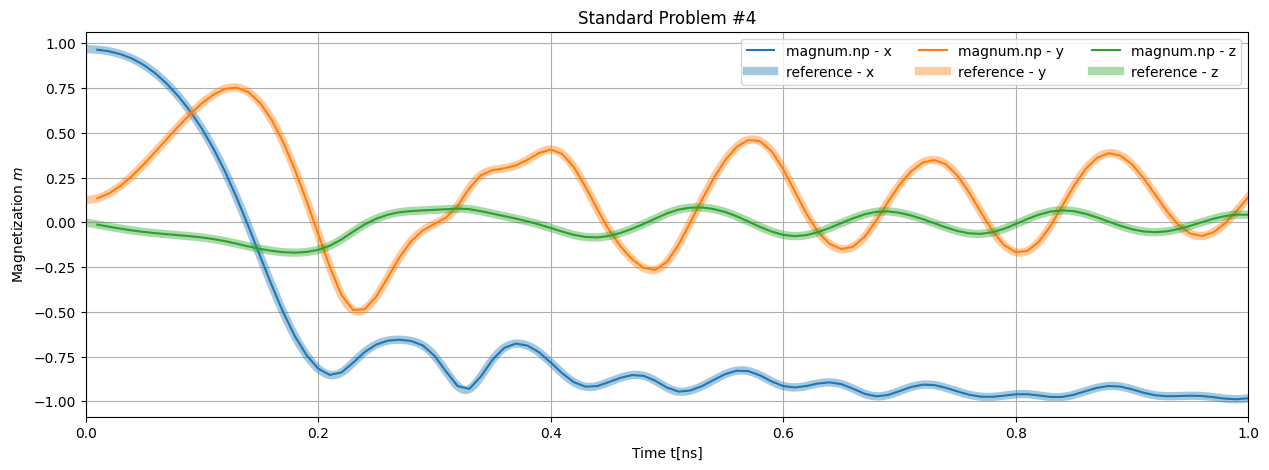

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/m.dat")

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[:,0]*1e9, ref[:,1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[:,0]*1e9, ref[:,2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[:,0]*1e9, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlim([0,1])
ax.set_title("Standard Problem #4")
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")